In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load the loan_info dataset

In [9]:
loan_info=pd.read_sas('D:/Input Data/SAS Datasets/loan_info.sas7bdat')

In [10]:
loan_info.shape

(887379, 10)

In [11]:
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,71823.0,70473.0,4350.0,4350.0,825.0,b'36 months',8.07,136.45,b'A',b'A4'
1,77757.0,70626.0,3000.0,3000.0,0.0,b'36 months',9.33,95.86,b'B',b'B3'
2,73003.0,70651.0,3200.0,3200.0,2000.0,b'36 months',9.96,103.20,b'B',b'B5'
3,70686.0,70681.0,5000.0,5000.0,0.0,b'36 months',7.75,156.11,b'A',b'A3'
4,72323.0,70694.0,5000.0,5000.0,350.0,b'36 months',11.54,164.98,b'C',b'C5'


In [26]:
loan_info.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000


In [12]:
loan_info.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade'],
      dtype='object')

### Load the extra_info_m dataset

In [14]:
extra_info=pd.read_sas('D:/Input Data/SAS Datasets/extra_info_m.sas7bdat')

In [15]:
extra_info.shape

(887379, 64)

In [19]:
extra_info.columns

Index(['url', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il

In [28]:
extra_info.dtypes

url                                    object
emp_title                              object
emp_length                             object
home_ownership                         object
annual_inc                            float64
verification_status                    object
issue_d                        datetime64[ns]
loan_status                            object
pymnt_plan                             object
desc                                   object
purpose                                object
title                                  object
zip_code                               object
addr_state                             object
dti                                   float64
delinq_2yrs                           float64
earliest_cr_line               datetime64[ns]
inq_last_6mths                        float64
mths_since_last_delinq                float64
mths_since_last_record                float64
open_acc                              float64
pub_rec                           

In [52]:
#Convert byte to object

In [45]:
extra_info['url']=extra_info['url'].str.decode("utf-8")

In [46]:
extra_info['url'][0]

'https://www.lendingclub.com/browse/loanDetail.action?loan_id=87023'

In [ ]:
#Add a new column called 'new_id' - by splitting the url string

In [50]:
extra_info['new_id']= extra_info['url'].str.split('=').str[1]

In [51]:
extra_info['new_id'].dtype

dtype('O')

In [53]:
extra_info["new_id"] = extra_info.new_id.astype(float)

In [54]:
extra_info['new_id'].describe()
###this is same as the column 'id' in the main file

count    8.873790e+05
mean     3.246513e+07
std      2.282734e+07
min      5.473400e+04
25%      9.206643e+06
50%      3.443327e+07
75%      5.490814e+07
max      6.861706e+07
Name: new_id, dtype: float64

In [59]:
###Check for null values

In [58]:
extra_info['new_id'].isnull().sum()

0

#### All statistical parameters match with column 'id' from the loan_info file. We can go ahead and merge both the files on 'id' and 'new_id'

In [60]:
###Merging both the files

In [61]:
loan_merge = pd.merge(loan_info,extra_info,left_on ='id', right_on ='new_id', how='outer')

In [64]:
loan_merge.shape

(887379, 75)

In [66]:
loan_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 75 columns):
id                             887379 non-null float64
member_id                      887379 non-null float64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
url                            887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d          

In [69]:
loan_merge.to_csv('loan_merge.csv')

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [70]:
### Check for missing values

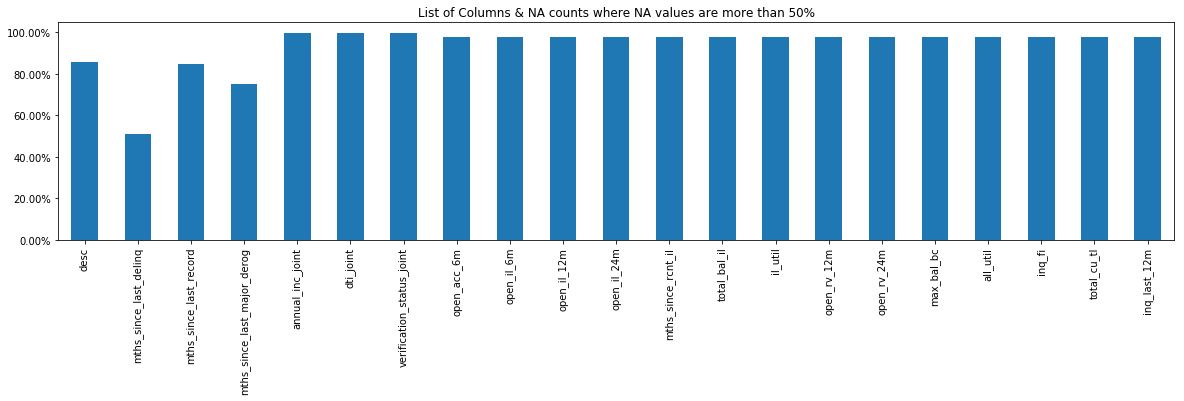

In [85]:
#percentage missing values
missing_data = loan_merge.isnull().sum()
missing_data = missing_data[missing_data.values >(0.5*len(loan_merge))]/len(loan_merge)

#plotting
plt.figure(figsize=(20,4))
ax = missing_data.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')

# manipulate axis format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.show()

In [92]:
missing_data.index

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [94]:
loan_merge.drop(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],axis=1, inplace=True)

In [96]:
loan_merge.shape

(887379, 54)

In [108]:
loan_merge.describe()

###policy code must be removed.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new_id
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887234.000000,887379.0,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05,8.873790e+05
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,45.919243,4.880757,2164.145585,0.014380,1.0,0.004991,2.257026e+02,1.394582e+05,3.206862e+04,3.246513e+07
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,409.693874,63.125281,4794.783233,0.134191,0.0,0.077625,1.031137e+04,1.537500e+05,3.749826e+04,2.282734e+07
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.473400e+04
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,0.000000,0.000000,280.170000,0.000000,1.0,0.000000,0.000000e+00,2.985300e+04,1.390000e+04,9.206643e+06
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,0.000000,0.000000,462.780000,0.000000,1.0,0.000000,0.000000e+00,8.055900e+04,2.370000e+04,3.443327e+07
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,0.000000,0.000000,831.245000,0.000000,1.0,0.000000,0.000000e+00,2.082050e+05,3.980000e+04,5.490814e+07
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,33520.270000,7002.190000,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06,6.861706e+07


In [106]:
levels = loan_merge.nunique()
levels = levels[levels.values==1]

In [107]:
levels

policy_code    1
dtype: int64

In [109]:
loan_merge.drop(['policy_code'], axis=1, inplace=True)

In [110]:
loan_merge.shape

(887379, 53)

In [111]:
loan_merge.columns

##can get rid of (member_id, url,new_id)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'url',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'new_id'],
      dtype='object')

In [112]:
loan_merge.drop(['member_id','url','new_id',], axis=1, inplace=True)

In [114]:
loan_merge.shape

(887379, 50)

In [290]:
loan_merge.total_pymnt.describe()

count    887379.000000
mean       7558.826684
std        7871.243336
min           0.000000
25%        1914.590000
50%        4894.999117
75%       10616.814230
max       57777.579870
Name: total_pymnt, dtype: float64

In [115]:
loan_merge.to_csv('loan_merge_50.csv')

In [113]:
loan_merge.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,...,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,887350.000000,8.171030e+05,8.171030e+05,8.171030e+05
mean,3.246513e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,...,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,0.004991,2.257026e+02,1.394582e+05,3.206862e+04
std,2.282734e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,...,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,0.077625,1.031137e+04,1.537500e+05,3.749826e+04
min,5.473400e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.206643e+06,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,...,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,0.000000,0.000000e+00,2.985300e+04,1.390000e+04
50%,3.443327e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,...,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,0.000000,0.000000e+00,8.055900e+04,2.370000e+04
75%,5.490814e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,1.000000,...,2238.265000,0.000000,0.000000,0.000000,831.245000,0.000000,0.000000,0.000000e+00,2.082050e+05,3.980000e+04
max,6.861706e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,33.000000,...,24205.620000,358.680000,33520.270000,7002.190000,36475.590000,20.000000,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [178]:
loan_merge = pd.read_csv('D:/Analysis/Supreet/loan_merge_50.csv')

Text(0.5, 1.0, 'Funded Amount Distribution')

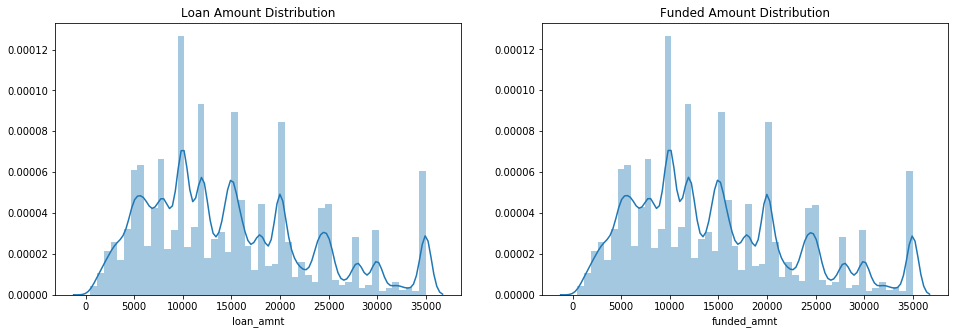

In [169]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.distplot(loan_merge['loan_amnt'], ax=ax[0])
ax[0].set_title("Loan Amount Distribution")
sns.distplot(loan_merge['funded_amnt'], ax=ax[1])
ax[1].set_title("Funded Amount Distribution")

In [208]:
loan_merge['term'].head()

0    36 months
1    36 months
2    36 months
3    36 months
4    36 months
Name: term, dtype: object

In [207]:
loan_merge['term'] = loan_merge['term'].str[2:-1]

Text(0, 0.5, 'Count')

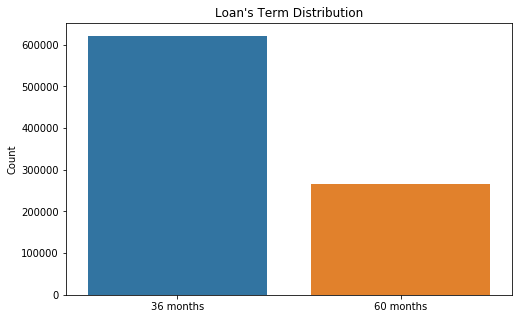

In [209]:
##bar graph
plt.figure(figsize=(8, 5))
sns.barplot(y=loan_merge.term.value_counts(), x=loan_merge.term.value_counts().index)
plt.xticks(rotation=0)
plt.title("Loan's Term Distribution")
plt.ylabel("Count")

In [211]:
loan_merge['grade'] = loan_merge['grade'].str[2:-1]

Text(0, 0.5, 'Count')

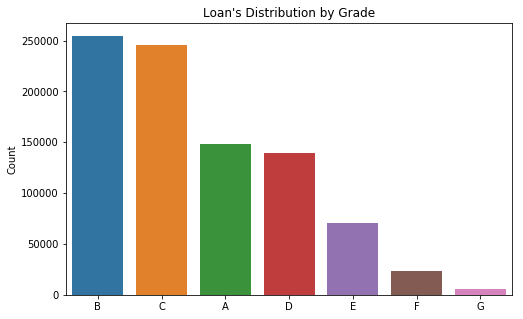

In [212]:
plt.figure(figsize=(8, 5))
sns.barplot(y=loan_merge.grade.value_counts(), x=loan_merge.grade.value_counts().index)
plt.xticks(rotation=0)
plt.title("Loan's Distribution by Grade")
plt.ylabel("Count")

In [217]:
loan_merge['sub_grade'] = loan_merge['sub_grade'].str[2:-1]

Text(0, 0.5, 'Count')

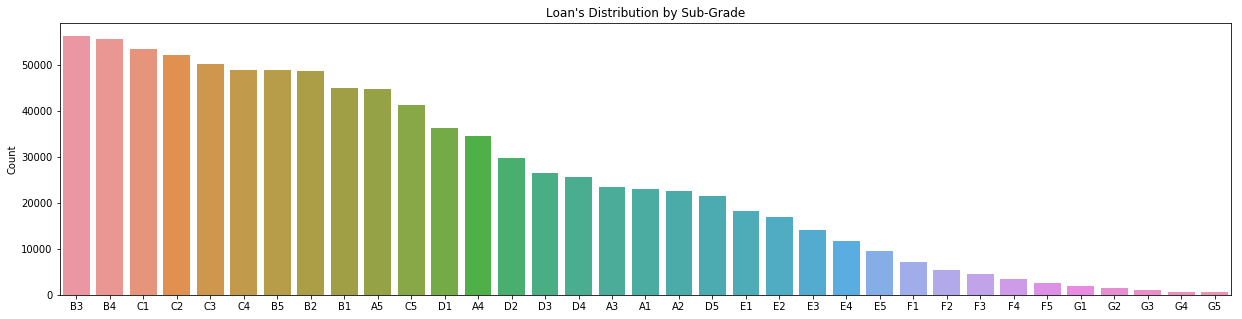

In [218]:
plt.figure(figsize=(21, 5))
sns.barplot(y=loan_merge.sub_grade.value_counts(), x=loan_merge.sub_grade.value_counts().index)
plt.xticks(rotation=0)
plt.title("Loan's Distribution by Sub-Grade")
plt.ylabel("Count")

In [219]:
loan_merge['purpose'] = loan_merge['purpose'].str[2:-1]

Text(0, 0.5, 'Percentage of Loan (%)')

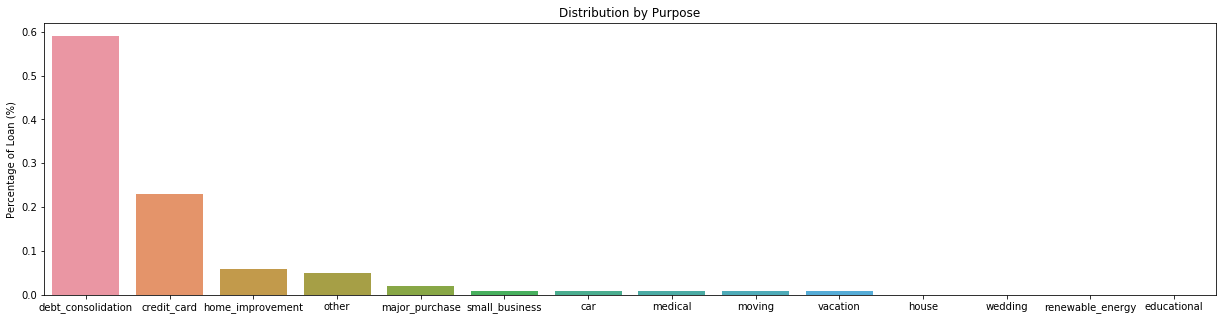

In [259]:
plt.figure(figsize=(21, 5))
sns.barplot(y=((loan_merge.purpose.value_counts()/len(loan_merge)).round(2)), x=loan_merge.purpose.value_counts().index)
plt.xticks(rotation=0)
plt.title("Distribution by Purpose")
plt.ylabel("Percentage of Loan (%)")

Text(0, 0.5, 'Count')

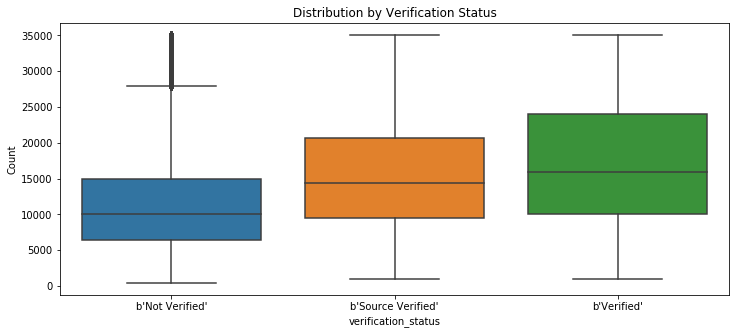

In [263]:
plt.figure(figsize=(12, 5))
sns.boxplot(y=loan_merge.loan_amnt, x=loan_merge.verification_status)
plt.title("Distribution by Verification Status")
plt.ylabel("Count")

### Analysis of Loan Status

In [292]:
loan_merge['loan_status'][0]

'Does not meet the credit policy. Status:Fully Paid'

In [293]:
loan_merge['loan_status'].unique()

array(['Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', nan],
      dtype=object)

In [271]:
loan_merge['loan_status'] = loan_merge['loan_status'].str[2:-1].head()

In [272]:
loan_merge['credit_policy'] = loan_merge['loan_status'].str.split('.').str[0]

In [275]:
loan_merge['credit_policy'].fillna("Meets credit policy", inplace=True)

In [276]:
loan_merge['credit_policy'].unique()

array(['Does not meet the credit policy', 'Meets credit policy'],
      dtype=object)

Text(0, 0.5, 'Percentage of Loan (%)')

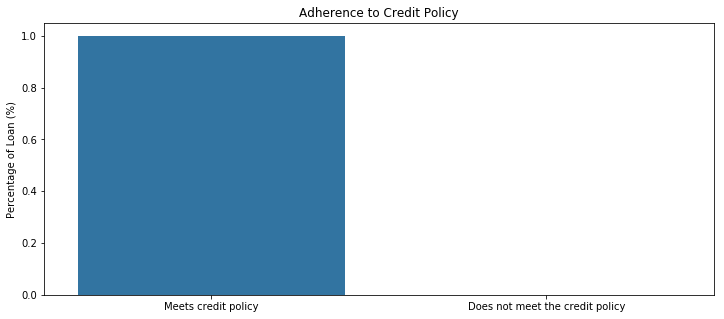

In [278]:
plt.figure(figsize=(12, 5))
sns.barplot(y=((loan_merge.credit_policy.value_counts()/len(loan_merge)).round(2)), x=loan_merge.credit_policy.value_counts().index)
plt.xticks(rotation=0)
plt.title("Adherence to Credit Policy")
plt.ylabel("Percentage of Loan (%)")

In [279]:
loan_merge['credit_policy'].value_counts()

Meets credit policy                887374
Does not meet the credit policy         5
Name: credit_policy, dtype: int64

### Loan Status

In [282]:
loan_merge['status_new'] = loan_merge['loan_status'].str.split(':').str[1]

In [283]:
loan_merge['status_new'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [294]:
extra_info['loan_status'].unique()

array([b'Fully Paid',
       b'Does not meet the credit policy. Status:Fully Paid',
       b'Does not meet the credit policy. Status:Charged Off',
       b'Charged Off', b'Late (31-120 days)', b'Default', b'Current',
       b'Late (16-30 days)', b'In Grace Period', b'Issued'], dtype=object)

In [297]:
extra_info['loan_status_new'] = extra_info['loan_status'].str.decode('utf-8')

In [301]:
extra_info['loan_status_new'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status_new, dtype: int64